# Graphistasis

![Graphistasis](assets/Logo.png)

Using a Graph Neural Network to mine gene-gene (epistatic) interactions for neurologic disease in the BioSNAP DGMiner dataset.

### Set up .venv
```bash
brew install uv
uv init
uv venv --python 3.11
source .venv/bin/activate

uv add torch torch_geometric pandas numpy matplotlib seaborn scikit-learn tqdm pip ipykernel

# pip install pyg-lib
```

### Import libraries

In [1]:
import torch
import torch_geometric
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from scripts.graph_construction import *
import networkx as nx

### Make directories
```bash
mkdir -p data
mkdir -p figures
mkdir -p models
```

### Download Dataset

```batch
wget -P data https://snap.stanford.edu/biodata/datasets/10020/files/DG-Miner_miner-disease-gene.tsv.gz

# Unzip the dataset
gzip -d data/DG-Miner_miner-disease-gene.tsv.gz
```

### Filter the dataset

In [2]:
# All genes
all = filter_data(disease_name="all_genes", disease_id='', save=True)

Reading in DGMiner TSV file as DataFrame object...
Filtering out missing values...
Cleaning disease names...
Results for: all_genes
Saving filtered DataFrame to all_genes_.tsv


In [3]:
# Filter for Schizophrenia-related (MESH:D012559) genes
schizophrenia = filter_data(disease_name="schizophrenia", disease_id="D012559", save=True)

Reading in DGMiner TSV file as DataFrame object...
Filtering out missing values...
Cleaning disease names...
Filtering by disease ID: D012559
Results for: schizophrenia
Saving filtered DataFrame to schizophrenia_D012559.tsv


In [4]:
# Filter for Mental-Disorder genes (D001523)
mental = filter_data(disease_name="mental_disorders", disease_id="D001523", save=True)

Reading in DGMiner TSV file as DataFrame object...
Filtering out missing values...
Cleaning disease names...
Filtering by disease ID: D001523
Results for: mental_disorders
Saving filtered DataFrame to mental_disorders_D001523.tsv


### Construct the graph

In [5]:
schizo_graph = graph_construction(schizophrenia)
mental_graph = graph_construction(mental)

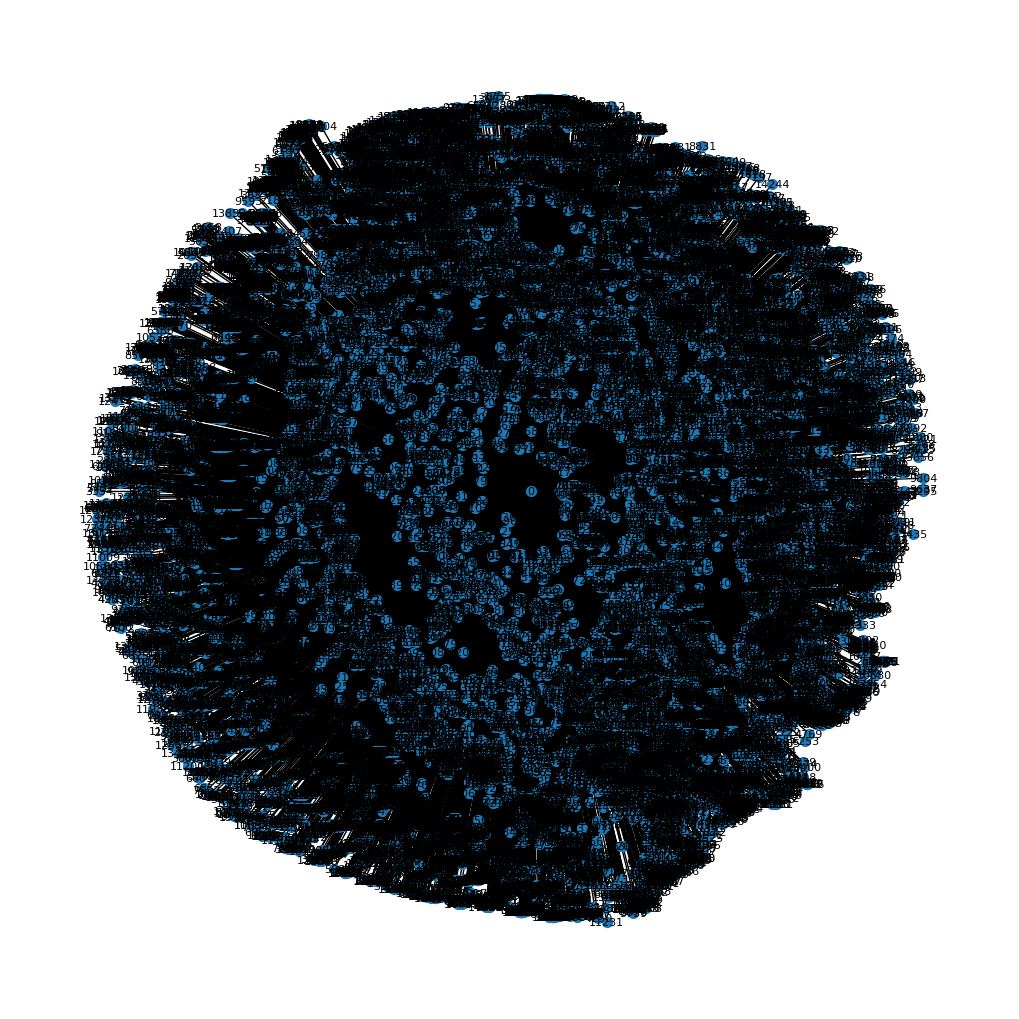

Graph saved to figures/schizo_graph.png


<Figure size 640x480 with 0 Axes>

In [6]:
visualize_graph(schizo_graph, save_path="figures/schizo_graph.png")

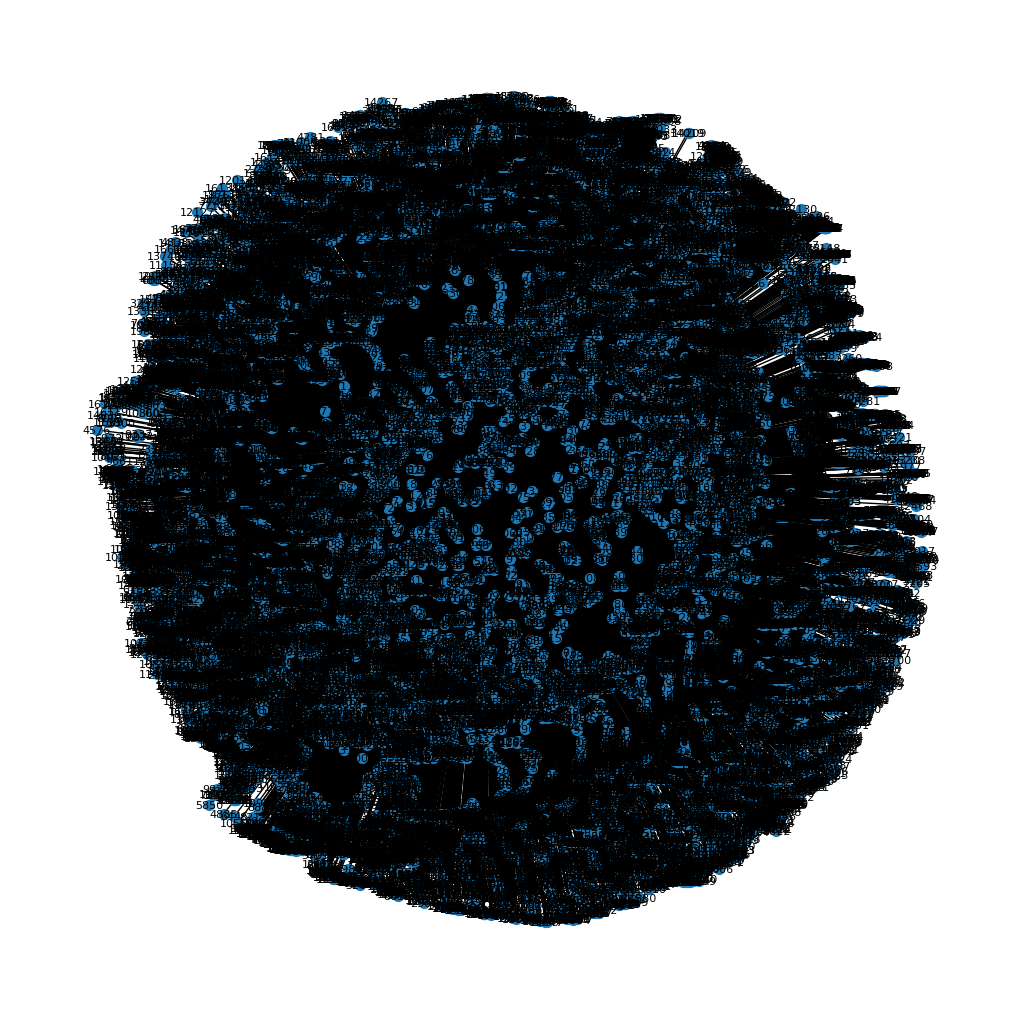

Graph saved to figures/mental_graph.png


<Figure size 640x480 with 0 Axes>

In [7]:
visualize_graph(mental_graph, save_path="figures/mental_graph.png")